In [12]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras import datasets, models, layers 
from sklearn.model_selection import train_test_split

In [13]:
(training_images, training_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [14]:
training_images = np.expand_dims(training_images, axis=3)
training_images.shape

(60000, 28, 28, 1)

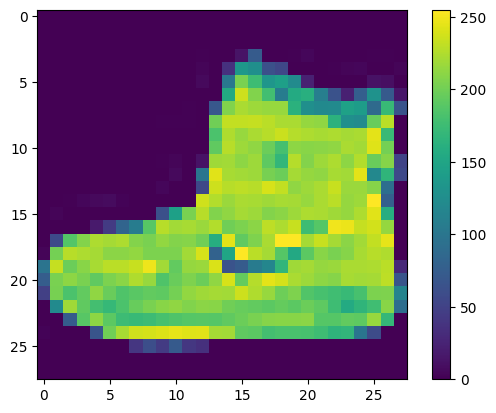

In [15]:
plt.figure()
plt.imshow(training_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
training_images = training_images / 255.0
test_images = test_images / 255.0 

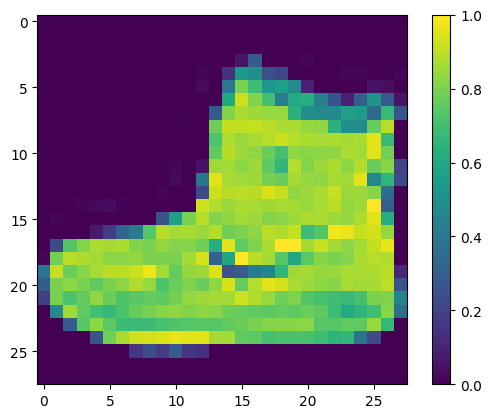

In [17]:
plt.figure()
plt.imshow(training_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
X_train, X_val, y_train, y_val = train_test_split(training_images, training_labels, random_state=34, test_size=0.2)

In [10]:
X_train.shape

(48000, 28, 28, 1)

## Train CNN with MLFLOW

In [39]:
import mlflow
import mlflow.keras
from tensorflow.keras import layers, models

In [45]:
run_optimizer="adam"
run_loss="sparse_categorical_crossentropy"
run_epochs = 20

In [46]:
mlflow.set_experiment("model_final")

# CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation="relu", input_shape=(28,28,1)), 
    tf.keras.layers.MaxPool2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer=run_optimizer,
              loss=run_loss,
              metrics=['accuracy'])

# Training the model
with mlflow.start_run() as run:
    mlflow.set_tag("mlflow.runName","1")
    mlflow.keras.autolog()

    history = model.fit(
        X_train, y_train, 
        batch_size=64, 
        epochs=run_epochs, 
        validation_data=(X_val, y_val))

mlflow.end_run()

Epoch 1/20
750/750 [==============================] - 28s 37ms/step - loss: 0.6216 - accuracy: 0.7764 - val_loss: 0.3842 - val_accuracy: 0.8606
Epoch 2/20
750/750 [==============================] - 28s 37ms/step - loss: 0.4027 - accuracy: 0.8554 - val_loss: 0.3293 - val_accuracy: 0.8796
Epoch 3/20
750/750 [==============================] - 30s 40ms/step - loss: 0.3502 - accuracy: 0.8737 - val_loss: 0.3107 - val_accuracy: 0.8862
Epoch 4/20
750/750 [==============================] - 28s 38ms/step - loss: 0.3147 - accuracy: 0.8858 - val_loss: 0.2878 - val_accuracy: 0.8947
Epoch 5/20
750/750 [==============================] - 28s 37ms/step - loss: 0.2942 - accuracy: 0.8943 - val_loss: 0.2761 - val_accuracy: 0.8988
Epoch 6/20
750/750 [==============================] - 28s 38ms/step - loss: 0.2739 - accuracy: 0.8999 - val_loss: 0.2687 - val_accuracy: 0.9022
Epoch 7/20
750/750 [==============================] - 27s 37ms/step - loss: 0.2536 - accuracy: 0.9068 - val_loss: 0.2520 - val_accuracy:

INFO:tensorflow:Assets written to: C:\Users\Slavka\AppData\Local\Temp\tmpetfto18n\model\data\model\assets


In [47]:
# Save model 
model.save("model_final", save_format='tf')


INFO:tensorflow:Assets written to: model_final\assets


INFO:tensorflow:Assets written to: model_final\assets


# Evaluate on test data: 
Running some tests to make sure everything will work as intended later on Flask:

In [18]:
model = tf.keras.models.load_model('model_final')
loss, acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - loss: 0.3037 - accuracy: 0.9116 - 2s/epoch - 6ms/step


In [7]:
from tensorflow.keras.preprocessing import image

file1 = "./downloads/1533.jpg"
file2 = "./downloads/1566.jpg"
file3 = "./downloads/1567.jpg"
img = image.load_img(file1, target_size=(28, 28), color_mode="grayscale")

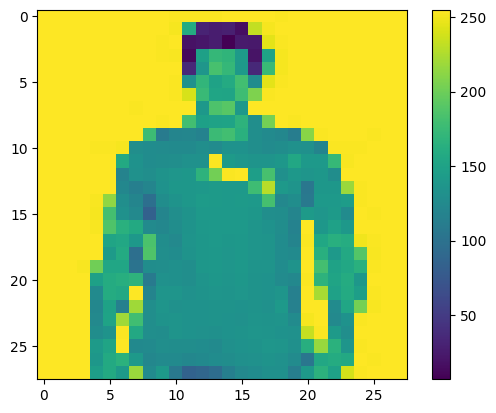

In [8]:
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
img_array = image.img_to_array(img)
img_array = img_array / 255.0

print(img_array.shape)


(28, 28, 1)


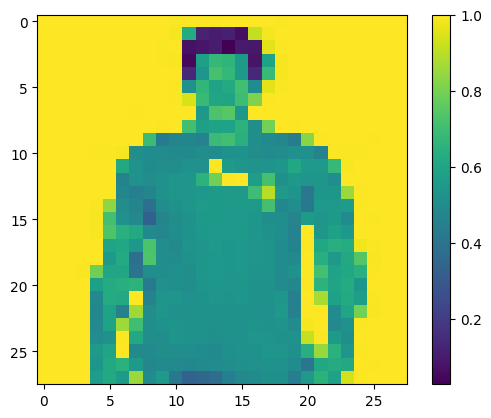

In [10]:
plt.figure()
plt.imshow(img_array)
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
img_array1 = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array1)
pred = np.round(pred, 2)
print(pred)
class_names[np.argmax(pred[0])]
# pred[0]

1/1 [==============================] - 0s 74ms/step
[[0.04 0.   0.94 0.   0.   0.   0.03 0.   0.   0.  ]]


'Pullover'